## What is Text Classification?

Text classification is the process of assigning predefined categories or labels to textual data. It is a fundamental task in Natural Language Processing (NLP) with applications like:
- **Spam detection**
- **Sentiment analysis**
- **Topic labeling**
- **Language detection**
- **Intent classification in chatbots**

There are several approaches to perform text classification:

1. **Traditional Machine Learning Models** (e.g., Naïve Bayes, Logistic Regression, Random Forest)
2. **Deep Learning Models** (e.g., LSTMs)
3. **Transformer-based Models** (e.g., BERT, DistilBERT, GPT)

Each approach has its own strengths and is suited to different types of data and complexity.
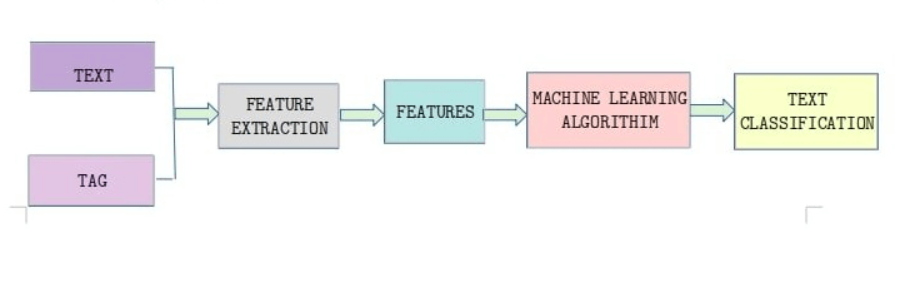

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# Load Dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['rec.sport.hockey', 'sci.space'], remove=('headers', 'footers', 'quotes'))
X = newsgroups.data
y = newsgroups.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The CountVectorizer is using the Bag-of-Words (BoW) model to convert text into a numerical format.

How the Bag-of-Words model works:
Tokenization – Splits text into individual words (tokens).

Vocabulary Building – Creates a vocabulary of unique words from the training data.

Word Count Representation – Converts each document into a numerical vector, where each dimension represents the count of a specific word in the document.

In [ ]:
# converting text to numerical using
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Naive Bayes
Naive Bayes is a probabilistic classifier based on Bayes' Theorem, assuming feature independence. It is especially effective for high-dimensional problems and is commonly used for spam detection and text classification due to its simplicity and speed.

Naive Bayes is like a smart guesser that uses math to figure out the most likely answer. It looks at the words in the text and makes predictions based on how often those words appear in different categories. Imagine you have a box of candies, and you know how many of each color are in the box. If someone gives you a candy without showing you the box, you can guess its color based on the chances of each color being picked. That's what Naive Bayes does with text!

In [ ]:
#Train Naive Bayes Model and find the y_pred
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

### Logistic Regression
Logistic Regression is a linear model for binary classification. It estimates the probability that an instance belongs to a particular class using a logistic function. Despite its name, it is widely used for classification problems.

For example, in a spam detection task, Logistic Regression can be used to classify emails as either "spam" or "not spam" based on features like the presence of certain keywords, email length, or sender information.

In [ ]:
#Train Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)

### Random Forest
Random Forest is an ensemble learning method that builds multiple decision trees and merges their outputs. It handles nonlinearities well, is robust to overfitting in many cases, and works well with both categorical and numerical features.

In [ ]:
#Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

### LSTM
LSTM (Long Short-Term Memory) networks are a type of Recurrent Neural Network (RNN) designed to model sequential data. LSTMs are particularly useful for capturing long-term dependencies in text.

For example, consider the sentence: "The cat, which was sitting on the mat, jumped when it saw the dog." To predict what "it" refers to, the model needs to remember the subject "cat" from earlier in the sentence. Traditional RNNs struggle with such long-term dependencies, but LSTMs are designed to handle them effectively by using mechanisms like gates to control the flow of information.

This makes LSTMs well-suited for tasks like:
- Sentiment analysis (e.g., determining if a review is positive or negative)
- Text generation (e.g., generating coherent sentences)
- Machine translation (e.g., translating text from one language to another)

In [ ]:
# LSTM Model
max_words = 5000
embedding_dim = 128
max_length = 100

# Tokenization
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_length)

# Define LSTM Model
lstm_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_length),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM
lstm_model.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_data=(X_test_pad, y_test))
y_pred_lstm = (lstm_model.predict(X_test_pad) > 0.5).astype("int32").flatten()

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.6078 - loss: 0.6764 - val_accuracy: 0.8719 - val_loss: 0.4053
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8782 - loss: 0.3956 - val_accuracy: 0.8920 - val_loss: 0.2345
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9406 - loss: 0.1894 - val_accuracy: 0.9070 - val_loss: 0.2147
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


### Transformer Models (BERT, GPT)

Transformers are attention-based models that have revolutionized NLP. Pre-trained models like **BERT**, **DistilBERT**, and **GPT** understand deep semantic meaning and context. They are state-of-the-art for many NLP tasks.

---

#### **BERT (Bidirectional Encoder Representations from Transformers)**

- **Bidirectional Context**: BERT reads text in both directions (left-to-right and right-to-left) to understand the full context of a word based on its surroundings.
- **Pre-training Tasks**:
    - **Masked Language Modeling (MLM)**: Randomly masks words in a sentence and trains the model to predict them.
    - **Next Sentence Prediction (NSP)**: Trains the model to understand relationships between sentences.
- **Applications**:
    - Text classification
    - Question answering
    - Named entity recognition
    - And more

---

#### **GPT (Generative Pre-trained Transformer)**

- **Unidirectional Context**: GPT processes text in a left-to-right manner, focusing on generating coherent and contextually relevant text.
- **Pre-training Task**:
    - **Causal Language Modeling (CLM)**: Predicts the next word in a sequence, making it ideal for text generation tasks.
- **Applications**:
    - Text generation
    - Summarization
    - Conversational AI
    - Creative writing

---

Both models leverage **transfer learning**, where they are pre-trained on large datasets and fine-tuned for specific tasks, making them highly versatile and powerful for NLP.

In [ ]:
# Transformer Model (BERT)
from transformers import AutoTokenizer, pipeline

tokenizer_bert = AutoTokenizer.from_pretrained("distilbert-base-uncased")
transformer_model = pipeline("text-classification", model="distilbert-base-uncased")

X_test_truncated = [tokenizer_bert(text, padding='max_length', truncation=True, max_length=512, return_tensors="pt") for text in X_test]
y_pred_bert = [int(transformer_model(tokenizer_bert.decode(text['input_ids'][0], skip_special_tokens=True))[0]['label'][-1]) for text in X_test_truncated]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


In [ ]:
# Performance Metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    # print("F1-score:", f1_score(y_true, y_pred, average='weighted'))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_lstm, "LSTM")
evaluate_model(y_test, y_pred_bert, "BERT Transformer")

Naïve Bayes Performance:
Accuracy: 0.949748743718593
Confusion Matrix:
[[192  10]
 [ 10 186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       202
           1       0.95      0.95      0.95       196

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398



Logistic Regression Performance:
Accuracy: 0.9447236180904522
Confusion Matrix:
[[185  17]
 [  5 191]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       202
           1       0.92      0.97      0.95       196

    accuracy                           0.94       398
   macro avg       0.95      0.95      0.94       398
weighted avg       0.95      0.94      0.94       398



Random Forest Performance:
Accuracy: 0.9472361809045227
Confusion Matrix:
[[183  19]
 [  2 194]]
Cl

## Conclusion

- **Naive Bayes** is fast and works well for small and clean datasets. It assumes feature independence, which may limit performance on complex data.
- **Logistic Regression** provides a strong and interpretable baseline for binary classification tasks.
- **Random Forest** can model complex relationships and feature interactions but may be less efficient on large sparse data.
- **LSTM** models context over time and is well-suited for longer sequences and more nuanced language.It means that LSTM models handle text that has finer details, subtle meanings, or context-dependent variations - like irony, sarcasm, or long dependencies : better than simpler models.
- **Transformers (BERT/GPT)** are state-of-the-art for understanding text context and semantics. They require more resources but offer superior performance on diverse text classification tasks.